<a href="https://colab.research.google.com/github/khanhne28/BT_AI/blob/main/Tuan2/fuzzy_logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 26.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=2c00f4c3253fb70508d12d122833c63ea78debc83cd6fc036eb0457a52c022da
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


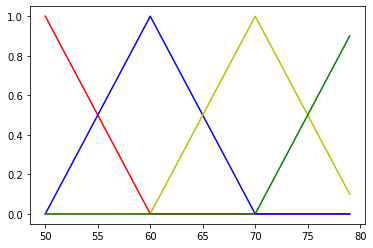

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(50,80,1)

slow  = fuzz.trimf(x,[50,50,60])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')

medium = fuzz.trimf(x,[50,60,70])
plt.plot(x,medium,'b',linewidth=1.5,label='medium')

medium_fast = fuzz.trimf(x,[60,70,80])
plt.plot(x,medium_fast,'y',linewidth=1.5,label='medium fast')

fast = fuzz.trimf(x,[70,80,80])
plt.plot(x,fast,'g',linewidth=1.5,label='fast')

In [33]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food =ctrl.Antecedent(np.arange(0,11,1),'food')
service =ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')

food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])

service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['average'] = fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,10])

tip['less'] = fuzz.trimf(tip.universe,[10,10,18])
tip['average'] = fuzz.trimf(tip.universe,[10,20,30])
tip['much'] = fuzz.trimf(tip.universe,[19,30,30])

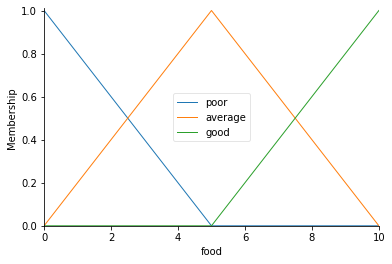

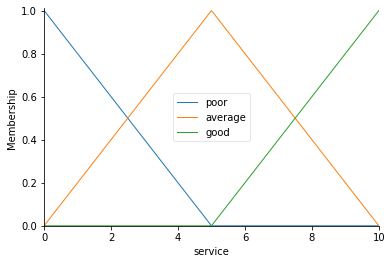

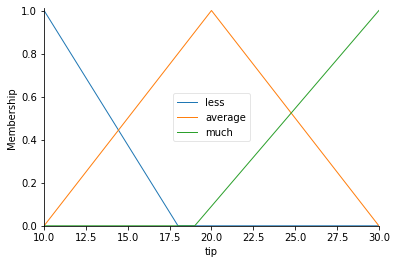

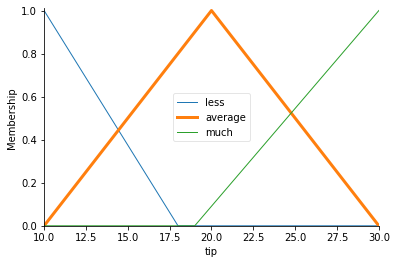

In [34]:
food.view()
service.view()
tip.view()
tip['average'].view()

In [35]:
rule1 = ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2 = ctrl.Rule(food['average']&service['poor'],tip['less'])
rule3 = ctrl.Rule(food['good']&service['poor'],tip['average'])
rule4 = ctrl.Rule(food['poor']&service['average'],tip['less'])
rule5 = ctrl.Rule(food['average']&service['average'],tip['average'])
rule6 = ctrl.Rule(food['good']&service['average'],tip['much'])
rule7 = ctrl.Rule(food['poor']&service['good'],tip['average'])
rule8 = ctrl.Rule(food['average']&service['good'],tip['much'])
rule9 = ctrl.Rule(food['good']&service['good'],tip['much'])

21.724990032981772


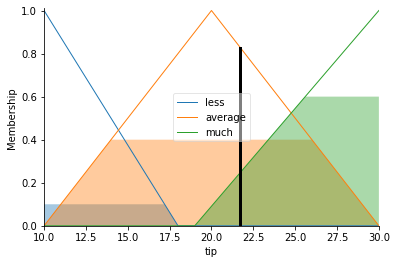

In [47]:
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 8
tipping.input['service'] = 4.5
tipping.compute() #tính toán
print(tipping.output['tip'])
tip.view(sim = tipping)

In [57]:
rice =ctrl.Antecedent(np.arange(100,2010,10),'rice')
time =ctrl.Antecedent(np.arange(10,301,1),'time')
pow = ctrl.Consequent(np.arange(0,101,1),'pow')

rice['less'] = fuzz.trimf(rice.universe,[100,100,300])
rice['medium_less'] = fuzz.trimf(rice.universe,[100,300,500])
rice['medium'] = fuzz.trimf(rice.universe,[300,700,1200])
rice['medium_much'] = fuzz.trimf(rice.universe,[1000,1800,2000])
rice['much'] = fuzz.trimf(rice.universe,[1500,2000,2000])

time['fast'] = fuzz.trimf(time.universe,[10,10,30])
time['medium_fast'] = fuzz.trimf(time.universe,[10,60,90])
time['medium'] = fuzz.trimf(time.universe,[60,150,180])
time['medium_slow'] = fuzz.trimf(time.universe,[120,220,250])
time['slow'] = fuzz.trimf(time.universe,[180,300,300])

pow['low'] = fuzz.trimf(pow.universe,[0,0,10])
pow['average_low'] = fuzz.trimf(pow.universe,[0,15,30])
pow['average'] = fuzz.trimf(pow.universe,[25,50,60])
pow['average_high'] = fuzz.trimf(pow.universe,[40,70,80])
pow['high'] = fuzz.trimf(pow.universe,[80,100,100])

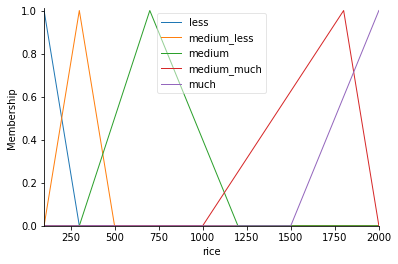

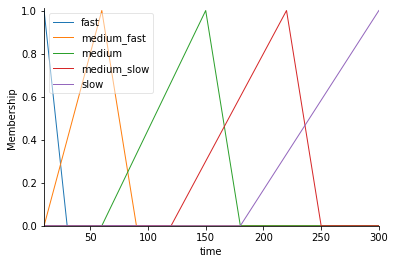

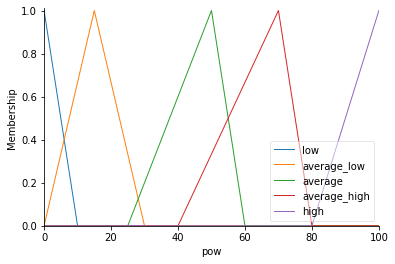

In [58]:
rice.view()
time.view()
pow.view()


In [59]:
rule1 = ctrl.Rule(rice['less']&time['fast'],pow['average'])
rule2 = ctrl.Rule(rice['less']&time['medium_fast'],pow['average'])
rule3 = ctrl.Rule(rice['less']&time['medium'],pow['average_low'])
rule4 = ctrl.Rule(rice['less']&time['medium_slow'],pow['low'])
rule5 = ctrl.Rule(rice['less']&time['slow'],pow['low'])
rule6 = ctrl.Rule(rice['medium_less']&time['fast'],pow['average_high'])
rule7 = ctrl.Rule(rice['medium_less']&time['medium_fast'],pow['average'])
rule8 = ctrl.Rule(rice['medium_less']&time['medium'],pow['average'])
rule9 = ctrl.Rule(rice['medium_less']&time['medium_slow'],pow['average_low'])
rule10 = ctrl.Rule(rice['medium_less']&time['slow'],pow['low'])
rule11 = ctrl.Rule(rice['medium']&time['fast'],pow['average_high'])
rule12 = ctrl.Rule(rice['medium']&time['medium_fast'],pow['average_high'])
rule13 = ctrl.Rule(rice['medium']&time['medium'],pow['average_high'])
rule14 = ctrl.Rule(rice['medium']&time['medium_slow'],pow['average'])
rule15 = ctrl.Rule(rice['medium']&time['slow'],pow['average_low'])
rule16 = ctrl.Rule(rice['medium_much']&time['fast'],pow['high'])
rule17 = ctrl.Rule(rice['medium_much']&time['medium_fast'],pow['high'])
rule18 = ctrl.Rule(rice['medium_much']&time['medium'],pow['average_high'])
rule19 = ctrl.Rule(rice['medium_much']&time['medium_slow'],pow['average_high'])
rule20 = ctrl.Rule(rice['medium_much']&time['slow'],pow['average'])
rule21 = ctrl.Rule(rice['much']&time['fast'],pow['high'])
rule22 = ctrl.Rule(rice['much']&time['medium_fast'],pow['high'])
rule23 = ctrl.Rule(rice['much']&time['medium'],pow['high'])
rule24 = ctrl.Rule(rice['much']&time['medium_slow'],pow['average_high'])
rule25 = ctrl.Rule(rice['much']&time['slow'],pow['average_high'])

63.333333333333336


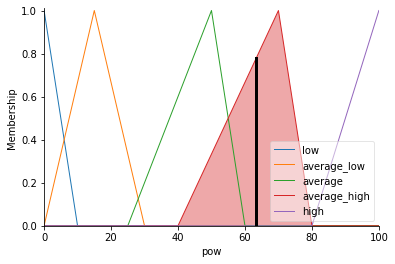

In [61]:
power_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,
                                   rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,
                                   rule23,rule24,rule25])
power = ctrl.ControlSystemSimulation(power_ctrl)
power.input['rice'] = 2000
power.input['time'] = 300
power.compute() #tính toán
print(power.output['pow'])
pow.view(sim = power)